In [9]:
import pandas as pd

# SCARICO IL DATABASE
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# CON I PRINT VISUALIZZO I DATI
print(df.shape)
print(df.info())

(401081, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401081 entries, 0 to 401080
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401081 non-null  object 
 1   continent                                   381867 non-null  object 
 2   location                                    401081 non-null  object 
 3   date                                        401081 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths_smoothed                         388966 non-nu

In [10]:
# FILTRO I DATI PER I CONTINENTI NON NULLI
df_continents = df.dropna(subset=['continent'])

# TOTALI PER CONTINENTI
cases_per_continent = df_continents.groupby('continent')['total_cases'].max().reset_index()
print(cases_per_continent)

       continent  total_cases
0         Africa    4072684.0
1           Asia   99356481.0
2         Europe   38997490.0
3  North America  103436829.0
4        Oceania   11853158.0
5  South America   37519960.0


In [12]:
def compare_continents(continent1, continent2):
    total_world_cases = df['total_cases'].max()

    # FILTRO PER CONTINENTI SELEZIONATI
    df_cont1 = df_continents[df_continents['continent'] == continent1]
    df_cont2 = df_continents[df_continents['continent'] == continent2]

    # DESCRITTORI STATISTICI
    stats = {}
    for cont, df_cont in zip([continent1, continent2], [df_cont1, df_cont2]):
        max_cases = df_cont['total_cases'].max()
        mean_cases = df_cont['total_cases'].mean()
        perc_world_cases = (max_cases / total_world_cases) * 100

        stats[cont] = {
            'max_cases': max_cases,
            'mean_cases': mean_cases,
            'perc_world_cases': perc_world_cases
        }

    return stats

# ESEMPIO
continent_stats = compare_continents('Europe', 'Asia')
print(continent_stats)

{'Europe': {'max_cases': 38997490.0, 'mean_cases': 2752466.054990805, 'perc_world_cases': 5.0288110617938395}, 'Asia': {'max_cases': 99356481.0, 'mean_cases': 3312037.179264429, 'perc_world_cases': 12.812234087724864}}


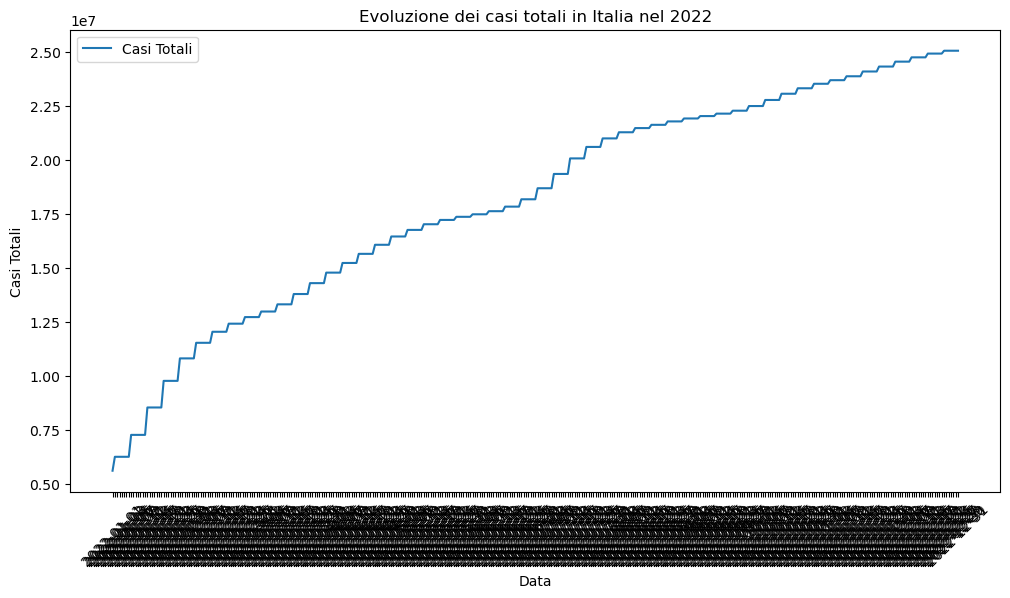

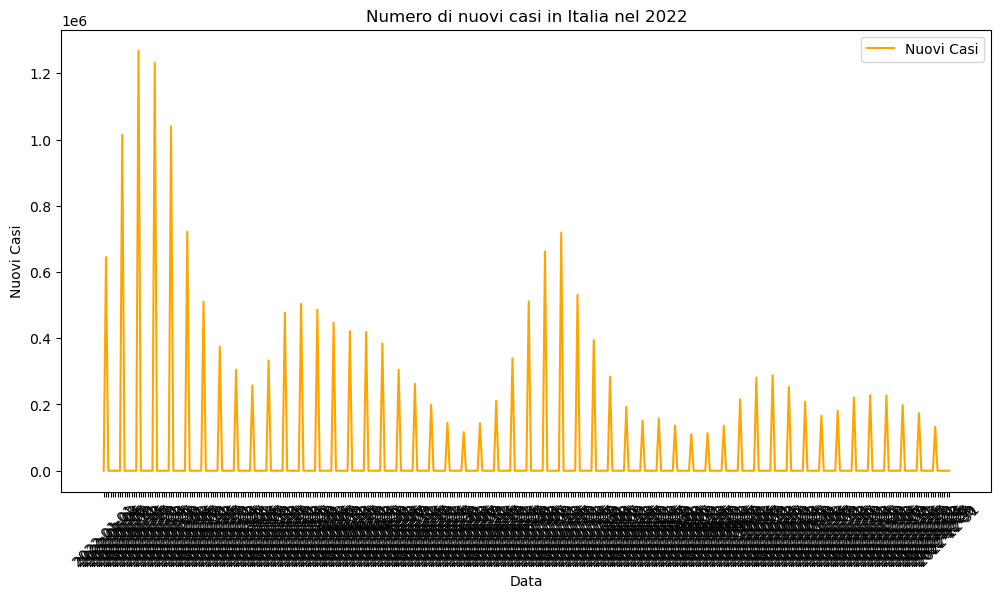

C:\Users\PC CASA\AppData\Local\Temp\ipykernel_7164\3453125924.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()


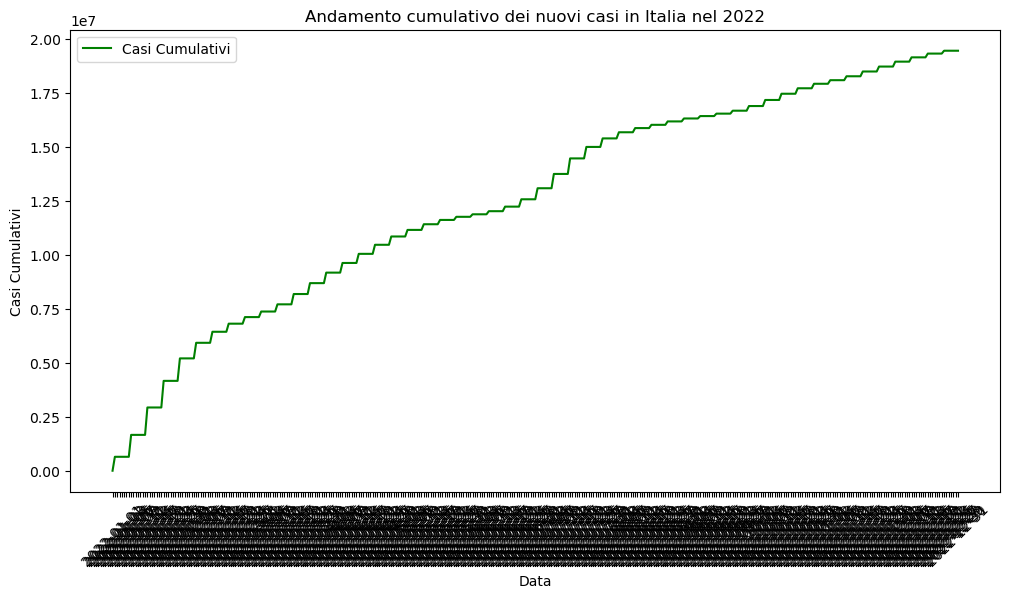

In [19]:
import matplotlib.pyplot as plt

# DATI ITALIA 2022
Italy_2022 = df[(df['location'] == 'Italy') & (df['date'].str.contains('2022'))]

# GRAFICO EVOLUZIONE CASI TOTALI 
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], label='Casi Totali')
plt.xticks(rotation=45)
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.legend()
plt.show()

# GRASFICO NUMERO NUOVI CASI
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xticks(rotation=45)
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.legend()
plt.show()

# GRAFICO SOMMA CUMULATIVA NUOVI CASI
italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'], label='Casi Cumulativi', color='green')
plt.xticks(rotation=45)
plt.title('Andamento cumulativo dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Cumulativi')
plt.legend()
plt.show()

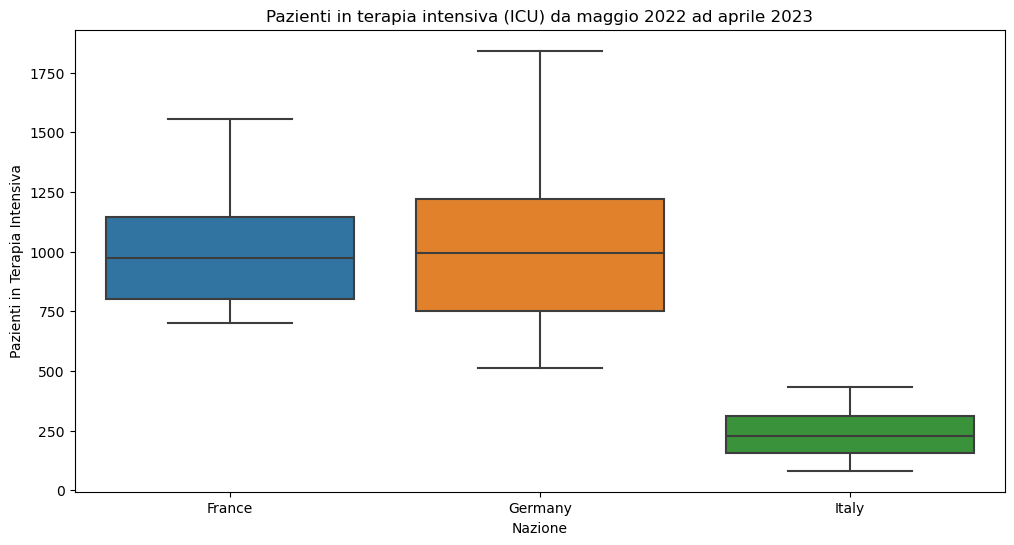

In [20]:
import seaborn as sns

# DATI ITALIA, GERMANIA E FRANCIA DA MAGGIO 2022 AD APRILE 2023
icu_data = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
              (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

# NUMERO PAZIENTI IN TERAPIA INTENSIVA
plt.figure(figsize=(12, 6))
sns.boxplot(data=icu_data, x='location', y='icu_patients')
plt.title('Pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

In [21]:
# ITALIA, GERMANIA. FRANCIA E SPAGNA 2023
hospitalized_data = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
                       (df['date'].str.contains('2023'))]

# SOMMA PAZIENTI OSPITALIZZATI
hospitalized_sum = hospitalized_data.groupby('location')['hosp_patients'].sum().reset_index()

# GESTIONE DATI NULLI
hospitalized_sum['hosp_patients'] = hospitalized_sum['hosp_patients'].fillna(0)

print(hospitalized_sum)

  location  hosp_patients
0   France      1382574.0
1  Germany            0.0
2    Italy      1175272.0
3    Spain       354602.0
